## Prediction en utilisant  Unsupervised ML 

In this task, we are going to predict the optimum number of clusters from the given iris dataset and represent it visually. This  includes unsupervised learning.

In [1]:
# Importer toutes les librairies necessaires 
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns


## Etape 1 : Lecture du dataset  

In [2]:
#  Chargement et Lecture de Iris Dataset 

data = pd.read_csv('C:/Users/pc/Downloads/Iris.csv')


In [3]:
# charger les premieres 5 lignes 

print(data.head()) 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# charger les dernieres 5 lignes 

print(data.tail()) 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [5]:
# Verifier les NaN values

print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


NaN standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable. For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. So, in this dataset, we don't have such values.

On remarque que dans notre dataset ,il n'y a pas de valeurs NaN 

In [6]:
#  Description Statistique

print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


###  Verifions maintenant les classes uniques du dataset 

In [7]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## Etape 2:  Data Visualization

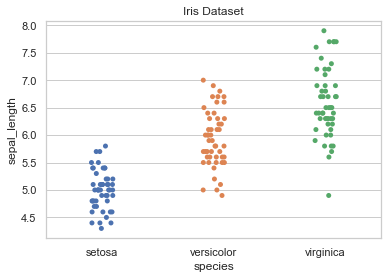

In [8]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

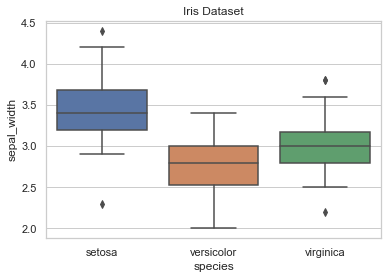

In [9]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

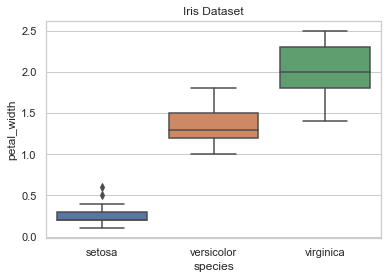

In [10]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

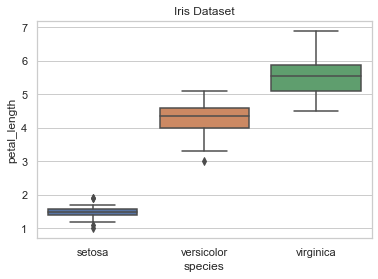

In [11]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

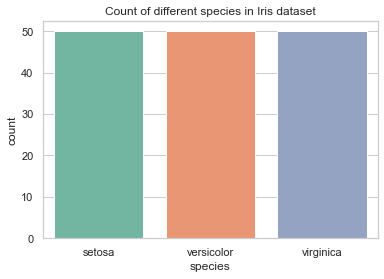

In [12]:
# Count plot
sns.countplot(x='species', data=iris, palette="Set2")
plt.title("Count of different species in Iris dataset")
plt.show()

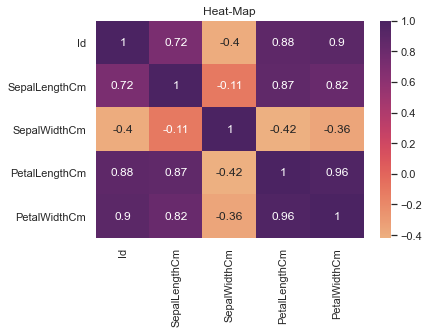

In [19]:
# Heat Map
sns.heatmap(data.corr(), annot=True,cmap='flare')
plt.title("Heat-Map")
plt.show()

## Etape 3 :  Trouver le nombre optimum de clusters en utilisant k-means clustering 

In [14]:
# Trouver le nombre optimum de clusters en utilisant k-means clustering 

x = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    ## ajouter le WCSS à la liste (kmeans.inertia_ retourne la valeur du WCSS pour initialized cluster)
    wcss.append(kmeans.inertia_) 
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17762.657226173542
k: 5 wcss: 11423.238080088988
k: 6 wcss: 7909.5306730769225
k: 7 wcss: 5881.448116883118
k: 8 wcss: 4562.780079365082
k: 9 wcss: 3579.7205612745106
k: 10 wcss: 2968.4914326653743


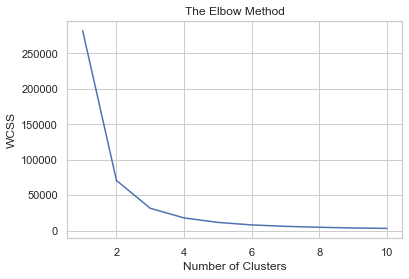

In [15]:
# Traçage des resutats en une ligne de graphe ,nous permet d'observer 'The elbow' Le coude .

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Nous pouvons voir qu'après 3 la baisse du WCSS est minime. Nous choisissons donc 3 comme nombre optimal de clusters.

## Etape 4 :   Initialisation de K-Means avec l'optimum nombre de clusters

In [16]:
# Fitting K-Means a la Dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Renvoie un label pour chaque point de données en se basant sur le nombre de clusters
y_kmeans = kmeans.fit_predict(x)

## Etape 5 : Prediction des Valeurs

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Etape 6 : Visualisation des Clusters

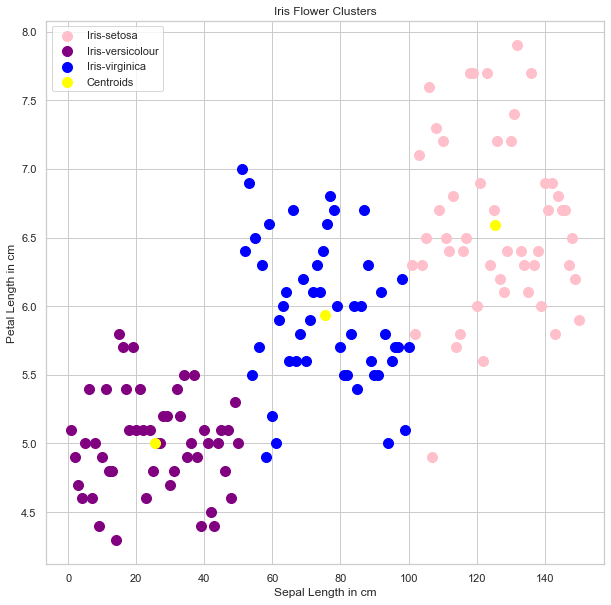

In [18]:
# Visualisation de clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='pink',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='purple',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='Iris-virginica')

# Traçage es centroïdes des clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()